# Objective
* Describe when classification is the appropriate analysis technique
* Use scikit-learn to perform classification

***

![penguins](Data/penguins2.png)

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# regression module
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

## 1. Gather and Prepare Data
We will be using seaborns's `penguins` dataset for this classification exammple. In order to load a seaborn dataset we use the `load_dataset` function in seaborn.

In [98]:
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


Looks like we have null values, let's figure out where they are, how many we have and what we should do with them!

In [99]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


Find all of the null values in the `sex` column.

In [100]:
penguins.loc[penguins.sex.isna()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


Drop row 3 and 339 since all of the data is null.

In [101]:
penguins = penguins.drop([3, 339])

Before we split our dataset into training and testing, we must map our string values to numbers. Change the `species`, `island` and `sex` columns to integers based on the mapping below.

| `species` | Mapped Value |
| :----: | :----: |
| Adelie | 0 | 
| Chinstrap | 1 |
| Gentoo | 2 |

| `island` | Mapped Value |
| :----: | :----: |
| Torgersen | 0 | 
| Biscoe | 1 |
| Dream | 2 |

| `sex` | Mapped Value |
| :----: | :----: |
| Male | 0 | 
| Female | 1 |



In [102]:
penguins.island.unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [103]:
penguins.species = penguins.species.map({'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2})

In [104]:
penguins.island = penguins.island.map({'Torgersen': 0, 'Biscoe': 1, 'Dream': 2})

In [105]:
penguins.sex = penguins.sex.map({'Male': 0, 'Female': 1})

Let's take a quick peek at our data to see if we might have success classifying the penguins sex.

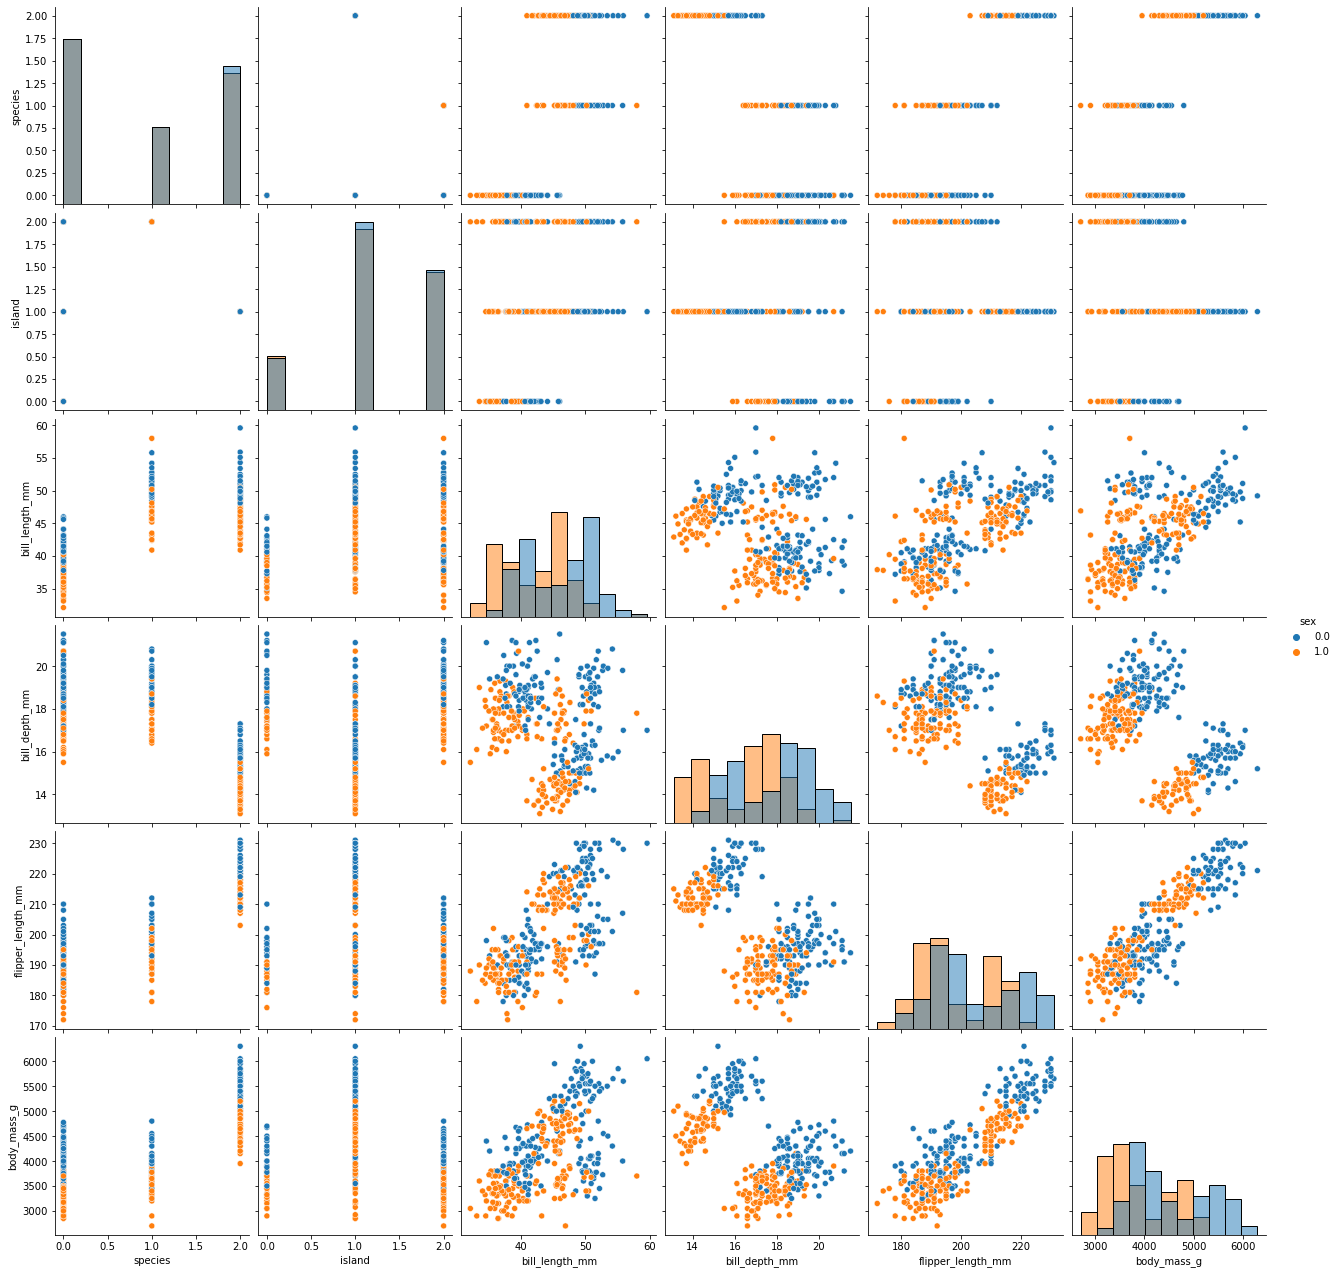

In [106]:
sns.pairplot(penguins, hue="sex", height=3,diag_kind="hist", palette='tab10')
plt.show()

It looks like we should be able to predict `sex`, **however** it looks like our data is split into groups not based on sex, but based on another feature! Let's do the same plot, but use `species` as the `hue`.

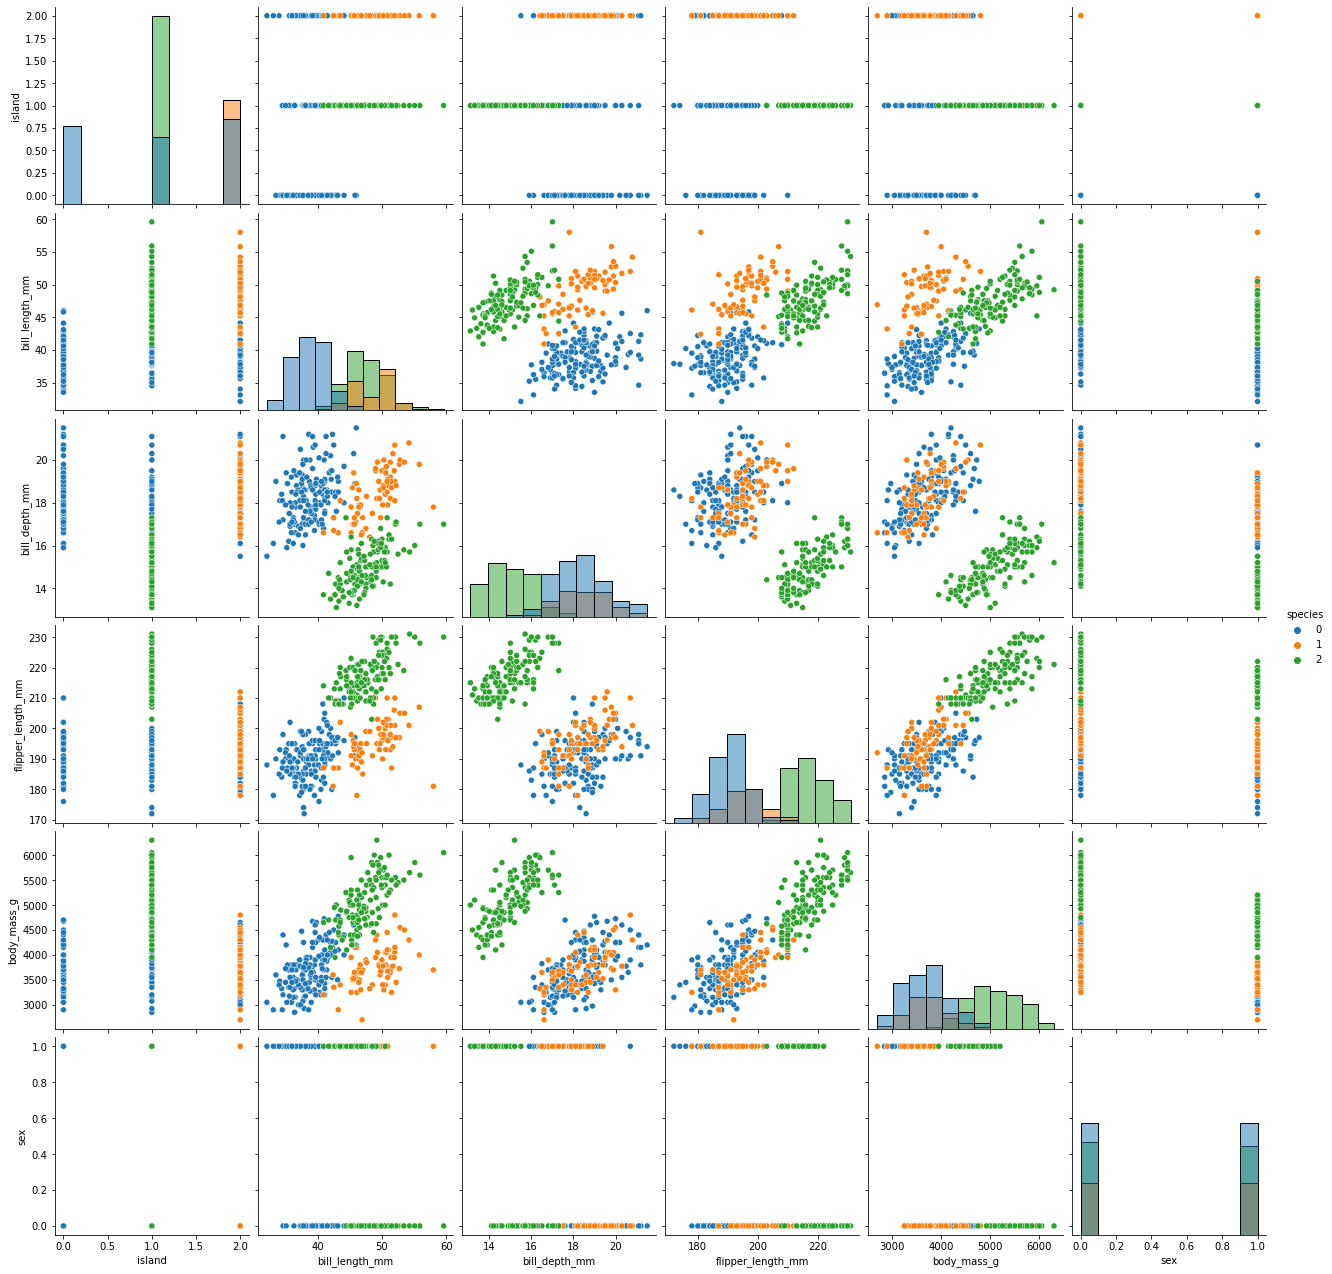

In [107]:
sns.pairplot(penguins, hue="species", height=3,diag_kind="hist", palette='tab10')
plt.show()

WOAH! It looks like we could use their bill depth, flipper length or body mass to easily predict which species they are! New plan, let's make a model to predict gender to fill in our null `sex` values and then make a model to predict species!

![image](Data/penguins.png)

Let's save the penguins with null `sex` values to a DataFrame called `test`. We will use these observations to test our model!

In [108]:
test = penguins.loc[penguins.sex.isna()]

Let's drop these null values from `penguins` and assign the resulting DataFrame (without any null values) to `train`.

In [109]:
train = penguins.dropna()

Now that we have our training and testing datasets, lets spearate our features (first 6 columns) from the target (`sex`) for both the `train` and `test` DataFrames.

In [110]:
X_train = train.iloc[:,:6]
y_train = train.iloc[:,-1]
X_test = test.iloc[:,:6]

## 2. Choose Model
Create an instance of the `KNeighborsClassifier` object where K=1.

In [111]:
knn = KNeighborsClassifier(n_neighbors=1)

## 3. Train Model
Fit the model using our `X_train` and `y_train`.

In [112]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

## 4. Evaluate Model
Let's check out the score of our model (range from 0-1). We can do so by using the `score` attribute of our `knn` (KNeighborsClassifier) object.

In [113]:
knn.score(X_train, y_train)

1.0

## 6. Make Predictions
Let's make predictions and fill in the null `sex` values.

In [114]:
y_pred = knn.predict(X_test)
y_pred

array([0., 0., 1., 1., 1., 0., 1., 1., 1.])

In [115]:
penguins.loc[penguins.sex.isna(), 'sex'] = y_pred

In [116]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    int64  
 1   island             342 non-null    int64  
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                342 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 21.4 KB


Let's go through the steps again to build a model to predict `species`! Separate the target (`species`) from our features (everything else). Split our `penguins` dataset into training and testing, with the `test_size` parameter set to 0.2.

In [117]:
y = penguins.species
X = penguins.drop('species', axis=1)

In [118]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [124]:
X_train.shape
X_test.shape

(69, 6)

In [125]:
y_train.shape
y_test.shape

(69,)

We will now go through the iterative process of choosing a model, training the model, and evaluating the model so we can find the best model for our data!

## KNN

In [130]:
scores = []
for K in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
scores

[0.855072463768116,
 0.7536231884057971,
 0.7681159420289855,
 0.782608695652174,
 0.8405797101449275,
 0.7971014492753623,
 0.7971014492753623,
 0.7681159420289855,
 0.782608695652174,
 0.7246376811594203]

## Logistic Regression

In [133]:
logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

0.9855072463768116